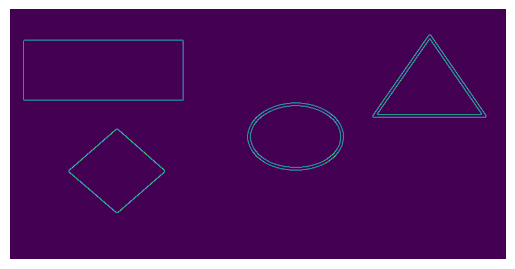

Number of Contours found = 4


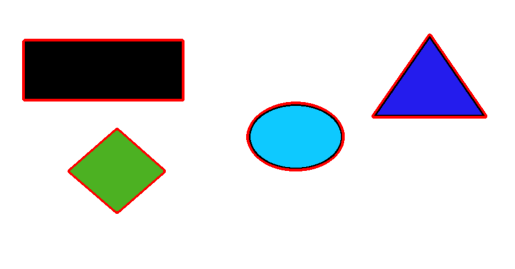

[[[194 217]]

 [[106 294]]

 [[192 369]]

 [[280 296]]]
[[[434 216]]

 [[431 237]]

 [[445 265]]

 [[499 291]]

 [[566 283]]

 [[592 265]]

 [[605 238]]

 [[602 214]]

 [[588 194]]

 [[536 171]]

 [[471 180]]

 [[448 195]]]
[[[ 24  58]]

 [[ 25 165]]

 [[314 165]]

 [[313  56]]]
[[[864 192]]

 [[762  46]]

 [[658 194]]]


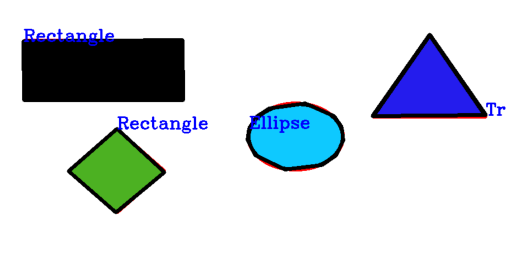

In [ ]:
# Import Necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Input image
image = cv2.imread("shape1.png")
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#plt.show('Canny Edges After Contouring', edged)
plt.imshow(edged)
plt.axis("off")
plt.show()
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (255, 0,0), 3)

#plt.show('Contours', image)
plt.imshow(image)
plt.axis("off")
plt.show()

cv2.waitKey(0)

# Set font to FONT_HERSHEY_COMPLEX
font = cv2.FONT_HERSHEY_COMPLEX
# fontScale
fontScale = 1

# Blue color in BGR
color = (0, 0, 255)

# Line thickness of 2 px
thickness = 2
# Loop through the contours and label them
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(image, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        print(approx)
        cv2.putText(image, "Triangle", (x, y), font,fontScale, color, thickness, 1, (0))
    elif len(approx) == 4:
        print(approx)
        cv2.putText(image, "Rectangle", (x, y), font,fontScale, color, thickness, 1, (0))
    elif len(approx) == 5:
        print(approx)
        cv2.putText(image, "Pentagon", (x, y), font,fontScale, color, thickness, 1, (0))
    elif 6 < len(approx) < 15:
        print(approx)
        cv2.putText(image, "Ellipse", (x, y), font,fontScale, color, thickness, 1, (0))
    else:
        print(approx)
        cv2.putText(image, "Circle", (x, y), font,fontScale, color, thickness, 1, (0))


# Save Output Image
cv2.imwrite("DetectedShapes1.jpg", image)

plt.imshow(image)
plt.axis("off")
plt.show()

cv2.waitKey(0)

cv2.destroyAllWindows()